# LiChess Data Analysis

# Section-1: Data Preparation and Cleaning

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('games.csv')
df.head(5)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [3]:
df.drop(columns = ['moves','opening_eco','last_move_at','created_at'],inplace=True)
df.head()

,id,rated,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,opening_name,opening_ply
0,TZJHLljE,False,13,outoftime,white,15+2,bourgris,1500,a-00,1191,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,16,resign,black,5+10,a-00,1322,skinnerua,1261,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,61,mate,white,5+10,ischia,1496,a-00,1500,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,Philidor Defense,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              20058 non-null  object
 1   rated           20058 non-null  bool  
 2   turns           20058 non-null  int64 
 3   victory_status  20058 non-null  object
 4   winner          20058 non-null  object
 5   increment_code  20058 non-null  object
 6   white_id        20058 non-null  object
 7   white_rating    20058 non-null  int64 
 8   black_id        20058 non-null  object
 9   black_rating    20058 non-null  int64 
 10  opening_name    20058 non-null  object
 11  opening_ply     20058 non-null  int64 
dtypes: bool(1), int64(4), object(7)
memory usage: 1.7+ MB


In [5]:
df.shape

(20058, 12)

In [6]:
df.opening_name.unique()

array(['Slav Defense: Exchange Variation',
       'Nimzowitsch Defense: Kennedy Variation',
       "King's Pawn Game: Leonardis Variation", ...,
       "Queen's Indian Defense: Classical Variation |  Traditional Variation",
       "Queen's Gambit Declined: Slav |  Dutch Variation",
       'Sicilian Defense: Najdorf Variation |  Polugaevsky Variation'],
      dtype=object)

In [7]:
df.white_id.unique().size

9438

In [8]:
df.isnull().sum()

id                0
rated             0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
opening_name      0
opening_ply       0
dtype: int64

So there are no empty values in dataset

In [9]:
df.describe()

,turns,white_rating,black_rating,opening_ply
count,20058.000000,20058.000000,20058.000000,20058.000000
mean,60.465999,1596.631868,1588.831987,4.816981
std,33.570585,291.253376,291.036126,2.797152
min,1.000000,784.000000,789.000000,1.000000
25%,37.000000,1398.000000,1391.000000,3.000000
50%,55.000000,1567.000000,1562.000000,4.000000
75%,79.000000,1793.000000,1784.000000,6.000000
max,349.000000,2700.000000,2723.000000,28.000000


In [10]:
df.dtypes

id                object
rated               bool
turns              int64
victory_status    object
winner            object
increment_code    object
white_id          object
white_rating       int64
black_id          object
black_rating       int64
opening_name      object
opening_ply        int64
dtype: object

In [11]:
df['opening_name'].astype(str)

0              Slav Defense: Exchange Variation
1        Nimzowitsch Defense: Kennedy Variation
2         King's Pawn Game: Leonardis Variation
3        Queen's Pawn Game: Zukertort Variation
4                              Philidor Defense
                          ...                  
20053                             Dutch Defense
20054                              Queen's Pawn
20055           Queen's Pawn Game: Mason Attack
20056                              Pirc Defense
20057           Queen's Pawn Game: Mason Attack
Name: opening_name, Length: 20058, dtype: object

# Section-2: Exploratory Analysis and Visualization

## Q1. Which is the most played chess opening?

In [12]:
popularopening = df.groupby('opening_name')[['id']].count()

In [13]:
popularopening = popularopening.sort_values('id',ascending = False).reset_index()
popularopening.rename(columns={'id':'Total','opening_name':'Opening Observed'},inplace=True)

In [14]:
popularopening.head(10)

,Opening Observed,Total
0,Van't Kruijs Opening,368
1,Sicilian Defense,358
2,Sicilian Defense: Bowdler Attack,296
3,Scotch Game,271
4,French Defense: Knight Variation,271
5,Scandinavian Defense: Mieses-Kotroc Variation,259
6,Queen's Pawn Game: Mason Attack,232
7,Queen's Pawn Game: Chigorin Variation,229
8,Scandinavian Defense,223
9,Horwitz Defense,209


In [15]:
labels=list(popularopening['Opening Observed'])
len(labels)

1477

There are so many variations of openings played, so we will take only top 10 openings.

In [16]:
popularopening = popularopening.iloc[0:10, :]
popularopening

,Opening Observed,Total
0,Van't Kruijs Opening,368
1,Sicilian Defense,358
2,Sicilian Defense: Bowdler Attack,296
3,Scotch Game,271
4,French Defense: Knight Variation,271
5,Scandinavian Defense: Mieses-Kotroc Variation,259
6,Queen's Pawn Game: Mason Attack,232
7,Queen's Pawn Game: Chigorin Variation,229
8,Scandinavian Defense,223
9,Horwitz Defense,209


In [17]:
labels=list(popularopening['Opening Observed'])

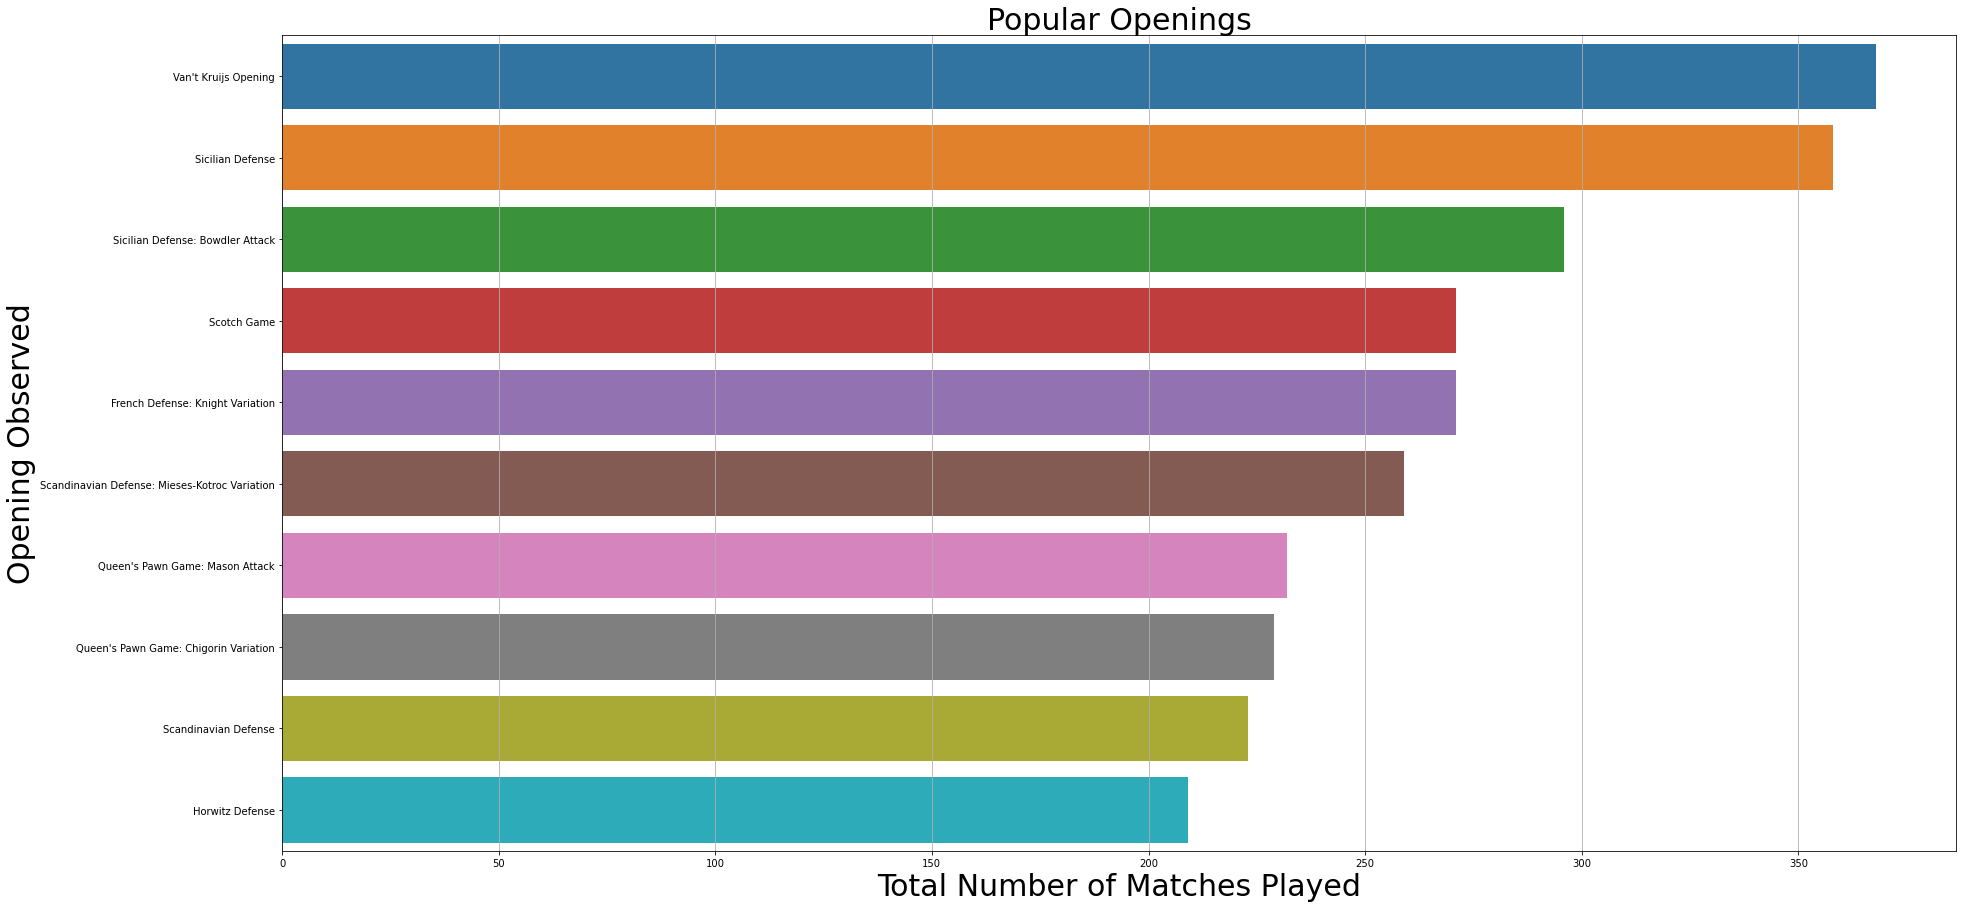

In [18]:
plt.figure(figsize=(30,15))
plt.grid()
plt.title('Popular Openings',fontsize=30)
barplot = sns.barplot(x='Total',y='Opening Observed',data=popularopening);
barplot.set_xlabel("Total Number of Matches Played", fontsize = 30);
barplot.set_ylabel("Opening Observed", fontsize = 30);

Clearly, Van't Krujis Oppening followed by Sicilian Defense are the most played openings in chess.

## Q2. How did most of the games concluded?

In [19]:
ending = df.groupby('victory_status')[['id']].count()
ending.head()

,id
victory_status,
draw,906
mate,6325
outoftime,1680
resign,11147


In [20]:
ending = ending.sort_values('id',ascending = False).reset_index()
ending.rename(columns={'id':'Total','victory_status':'Conclusion'},inplace=True)
ending.head()

,Conclusion,Total
0,resign,11147
1,mate,6325
2,outoftime,1680
3,draw,906


In [21]:
labels = list(ending['Conclusion'])

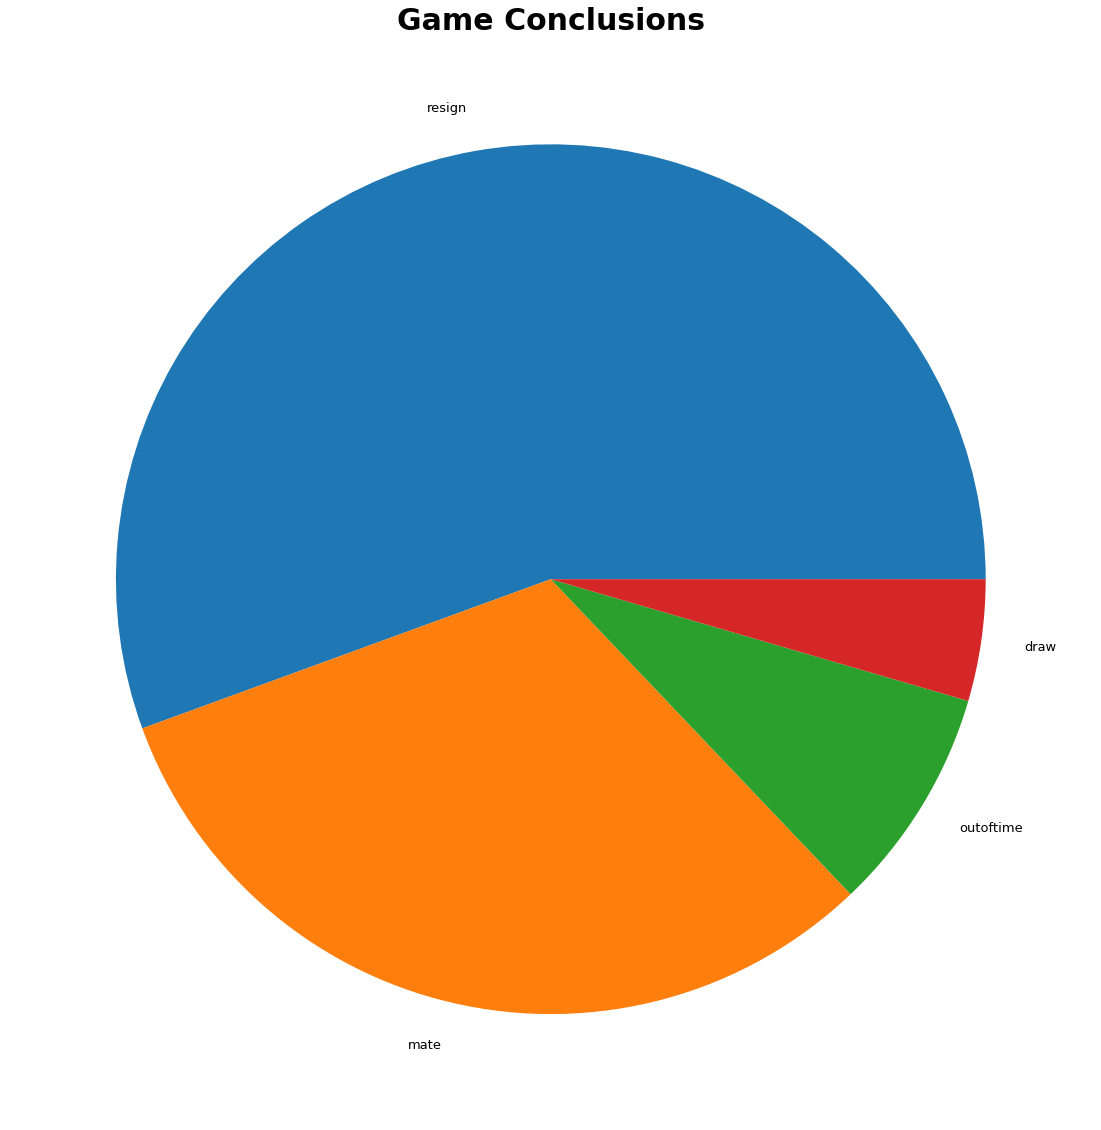

In [22]:
plt.figure(figsize=(20,20))
plt.title("Game Conclusions",fontweight='bold',fontsize=30)
plt.tick_params(labelsize=40)
plt.pie(ending.Total,labels=labels,textprops={'fontsize': 13});

Most of the games ended in resignation of a player.

## Q3. What is the distribution of number of turns played in a match?

In [23]:
turndf = df.groupby('turns')[['id']].count()
turndf.head()

,id
turns,
1,18
2,185
3,87
4,52
5,40


In [24]:
turndf.info

<bound method DataFrame.info of         id
turns     
1       18
2      185
3       87
4       52
5       40
...    ...
222      2
226      1
255      1
259      1
349      2

[211 rows x 1 columns]>

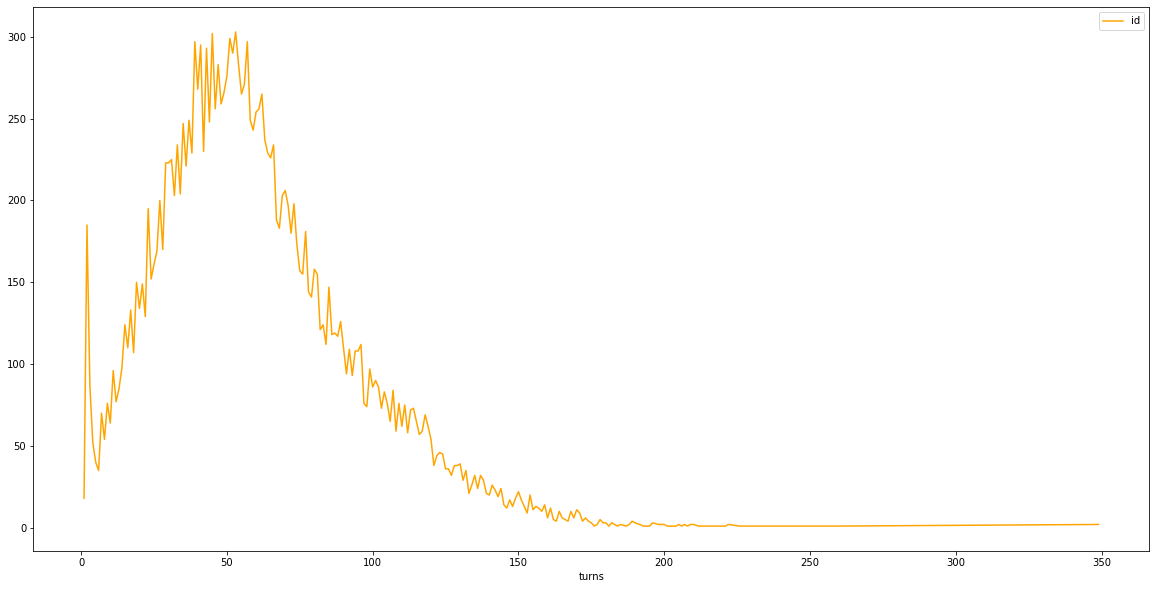

In [25]:
lines = turndf.plot.line(color = 'orange',figsize=(20,10))

In [26]:
turndf.describe()

,id
count,211.000000
mean,95.061611
std,93.972645
min,1.000000
25%,11.000000
50%,65.000000
75%,159.500000
max,303.000000


More than half of the matches ended within 65 moves.

In [27]:
df.columns

Index(['id', 'rated', 'turns', 'victory_status', 'winner', 'increment_code',
       'white_id', 'white_rating', 'black_id', 'black_rating', 'opening_name',
       'opening_ply'],
      dtype='object')

## Q4. Which color is likely to win more games?

In [42]:
df.winner.unique()

array(['white', 'black', 'draw'], dtype=object)

In [43]:
colordf = df.groupby('winner')[['id']].count()

In [44]:
colordf

,id
winner,
black,9107
draw,950
white,10001


In [45]:
colordf = colordf.sort_values('id').reset_index()
colordf.rename(columns = {'winner':'Winner','id':'Victories'},inplace=True)
colordf.head()

,Winner,Victories
0,draw,950
1,black,9107
2,white,10001


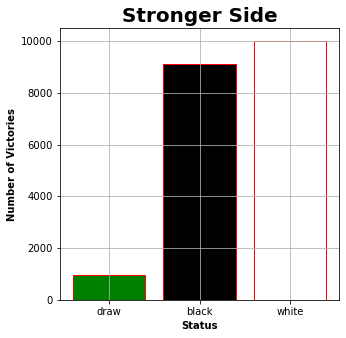

In [52]:
#Lets plot the Result
plt.figure(figsize=(5,5))
plt.title("Stronger Side",fontweight='bold',fontsize=20)
plt.xlabel('Status',fontweight='bold',fontsize=10)
plt.ylabel('Number of Victories',fontweight='bold',fontsize=10)
plt.tick_params(labelsize=10)
plt.grid()
plt.bar(colordf.Winner, colordf.Victories,edgecolor='red',color=['green','black','white']);

Seems like white color can bag you some more wins.

In [55]:
df.columns

Index(['id', 'rated', 'turns', 'victory_status', 'winner', 'increment_code',
       'white_id', 'white_rating', 'black_id', 'black_rating', 'opening_name',
       'opening_ply'],
      dtype='object')

## Q5. What is distribution of rated players?

In [58]:
whitedf = df.groupby('white_rating')[['id']].count()
whitedf

,id
white_rating,
784,2
788,1
793,1
795,1
798,2
...,...
2617,1
2619,2
2621,24


In [59]:
blackdf = df.groupby('black_rating')[['id']].count()
blackdf

,id
black_rating,
789,1
791,1
795,2
796,1
800,1
...,...
2571,1
2577,1
2588,1


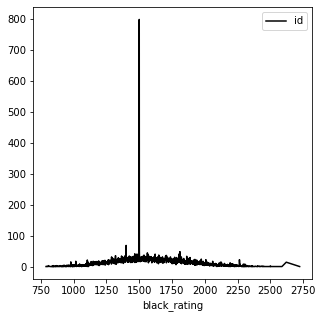

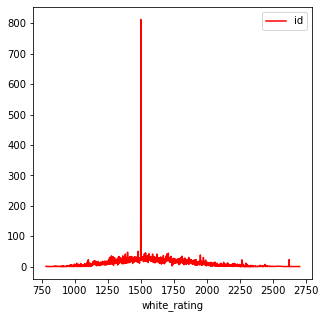

In [63]:
line1 = blackdf.plot.line(color = 'black',figsize=(5,5))
line2 = whitedf.plot.line(color = 'red',figsize=(5,5))

All the players are seemingly equally rated.

# Section 3: Inferences and Conclusion

In this analysis I used the games.csv file from the kaggle Datasets. Following are my conclusions about it:

    1. Van't Krujis Opening and Sicilian Defense are the most played opening in chess.
    2. Most of the games concluded when a player resigned.
    3. More than half of the matches ended within first 65 moves of the game.
    4. White Side seems to more victorious in the game.
    5. All rated matches were between likely equally rated players.

## References
The Pandas DataFrame: https://www.shanelynn.ie/using-pandas-dataframe-creating-editing-viewing-data-in-python/#:~:text=To%20delete%20rows%20and%20columns,the%20need%20for%20'axis

Seaborn gallery: https://seaborn.pydata.org/examples/index.html

Matplotlib gallery: https://matplotlib.org/3.1.1/gallery/index.html

https://www.geeksforgeeks.org/change-figure-size-in-pandas-python/

